In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from src.model.instance_hardness import *
from src.utils import *
from src.visualization.plots import *
from src.model.dkdn import *
from src.model.sampling import weighted_sample

np.random.seed(1234)

n = 100

mu1, mu2, sigma = 0, -2, 1

X1 = np.random.normal(mu1, sigma, size=[n, 2])
X2 = np.random.normal(mu2, sigma, size=[n, 2])
X3 = np.random.normal([-2, 2], 0.5, size=[n, 2])
X = np.vstack((X1, X2, X3))

y = np.hstack((np.zeros(int(len(X1))),np.ones(int(len(X2) + len(X3))))).astype(int)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Conjunto de datos de train

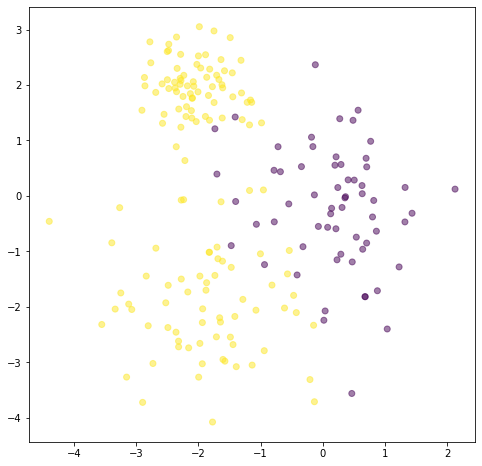

In [4]:
figure, axes = plt.subplots(figsize=[8, 8])

plt.scatter(X_train[:,0],X_train[:,1], c=y_train, alpha=0.5)

plt.show()

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

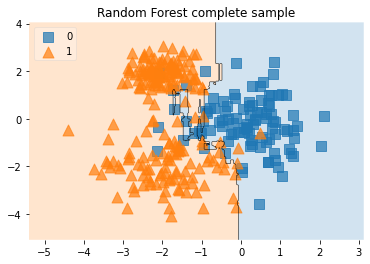

In [33]:
custom_decision_region_plot(X, y, rf, 'Random Forest complete sample')

In [34]:
preds = rf.predict(X_test)
confusion_matrix(preds, y_test)

real,0,1,total
pred,,,
0,0.32,0.04,0.36
1,0.06,0.58,0.64
total,0.38,0.62,1.00


### Cálculo de complejidad

#### KDN

In [5]:
complexity, _ = kdn_score(X_train, y_train, 5)

In [6]:
pd.Series(complexity).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.096517
std        0.220086
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

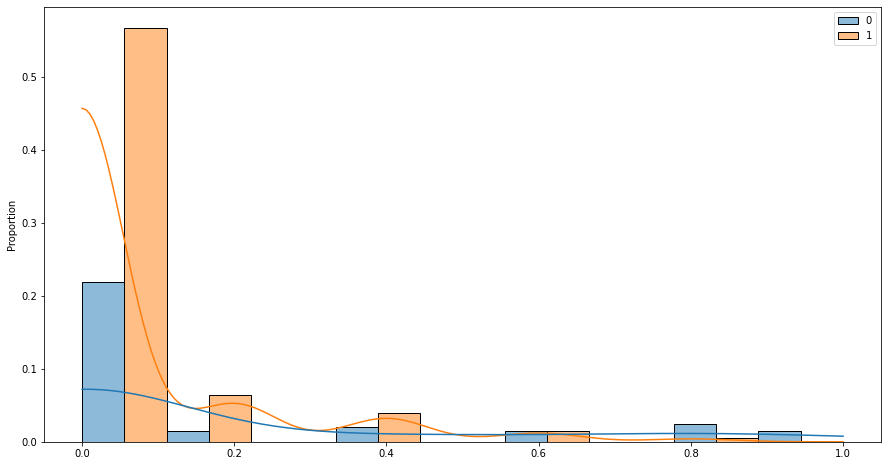

In [7]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [8]:
global_complexity = np.mean(complexity)
class0_complexity = np.mean(complexity[y_train < 1])
class1_complexity = np.mean(complexity[y_train > 0])

In [9]:
global_complexity

0.09651741293532337

In [10]:
class1_complexity

0.060431654676258995

In [11]:
class0_complexity

0.1774193548387097

In [16]:
sample_idx = weighted_sample(complexity, y=None, prop_sample=0.1, replace=False, distribution=None, random_state=1234, kwargs=None)

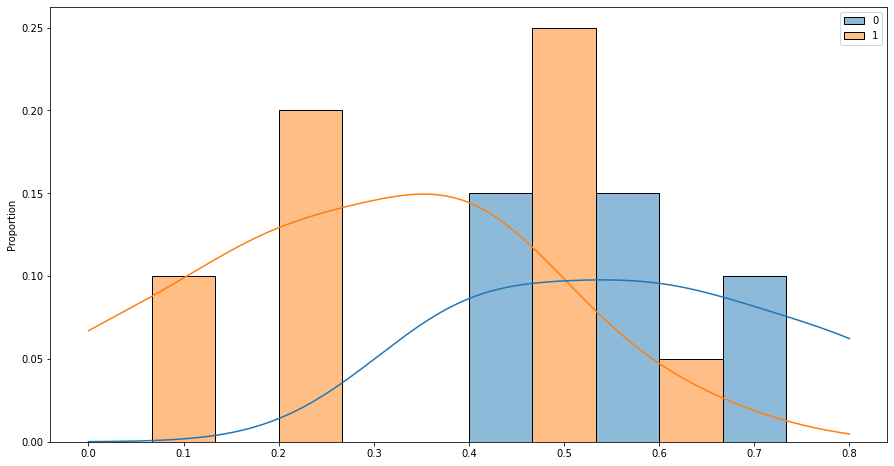

In [18]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity[sample_idx], hue=y_train.astype(int)[sample_idx], kde=True, multiple='dodge', stat='proportion');

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train[sample_idx], y_train[sample_idx])

RandomForestClassifier()

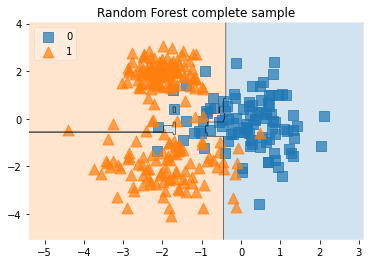

In [37]:
custom_decision_region_plot(X, y, rf, 'Random Forest complete sample')

In [38]:
preds = rf.predict(X_test)
confusion_matrix(preds, y_test)

real,0,1,total
pred,,,
0,0.27,0.03,0.3
1,0.11,0.59,0.7
total,0.38,0.62,1.0


#### Dynamic KDN

In [52]:
dynamic_kdn = DkDN(k=3)
dynamic_kdn.fit(X_train, y_train, exclude_center=False)
complexity_d = dynamic_kdn.complexity

In [53]:
pd.Series(complexity_d).describe(percentiles=[0.25, 0.5, 0.75])

count    201.000000
mean       0.072338
std        0.171496
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.890000
dtype: float64

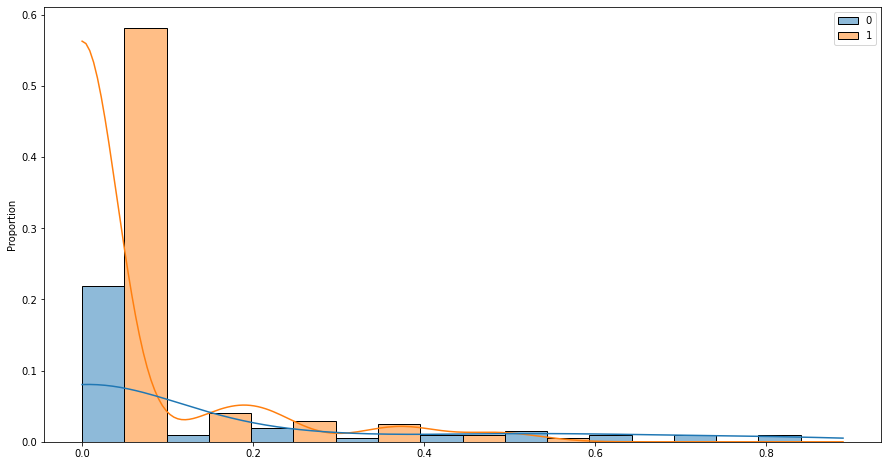

In [54]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity_d, hue=y_train.astype(int), kde=True, multiple='dodge', stat='proportion');

In [55]:
global_complexity_d = np.mean(complexity_d)
class0_complexity_d = np.mean(complexity_d[y_train < 1])
class1_complexity_d = np.mean(complexity_d[y_train > 0])

In [56]:
global_complexity_d

0.07233830845771144

In [57]:
class1_complexity_d

0.04266187050359712

In [58]:
class0_complexity_d

0.13887096774193544

In [71]:
sample_idx = weighted_sample(complexity_d, y=None, prop_sample=0.1, replace=False, distribution=None, random_state=1234, kwargs=None)

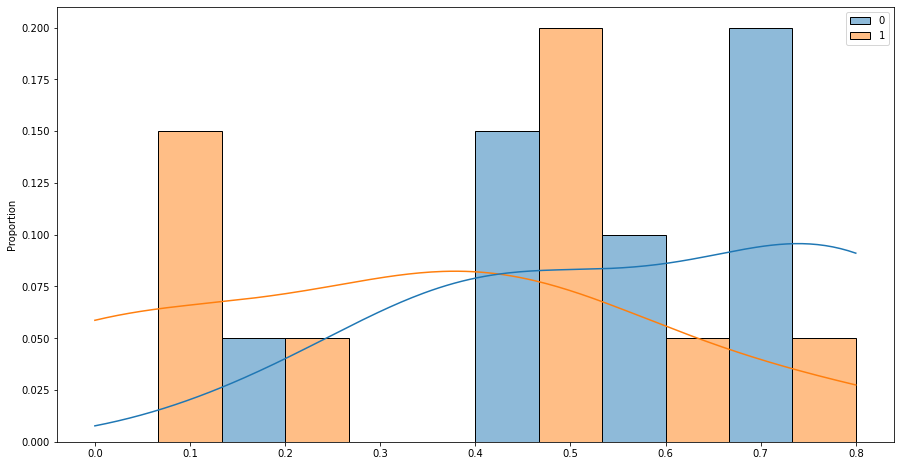

In [66]:
plt.figure(figsize=(15,8))
sns.histplot(x=complexity[sample_idx], hue=y_train.astype(int)[sample_idx], kde=True, multiple='dodge', stat='proportion');

In [67]:
rf = RandomForestClassifier()

In [68]:
rf.fit(X_train[sample_idx], y_train[sample_idx])

RandomForestClassifier()

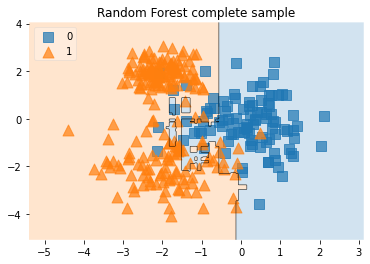

In [69]:
custom_decision_region_plot(X, y, rf, 'Random Forest complete sample')

In [70]:
preds = rf.predict(X_test)
confusion_matrix(preds, y_test)

real,0,1,total
pred,,,
0,0.31,0.06,0.37
1,0.07,0.56,0.63
total,0.38,0.62,1.00
